In [1]:
import numpy as np
import pandas as pd

In [2]:
######
# website : https://ess.sikt.no/en/datafile/a93fed5b-3858-4e86-bdae-dfcf5bbc9bf9/33?tab=0


data = pd.read_csv("data/ESS10/ESS10.csv")
data.shape

/tmp/ipykernel_1044/4291870769.py:5: DtypeWarning: Columns (166,172,174,607,608) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/ESS10/ESS10.csv")


(37611, 618)

In [3]:
# The goal is to analyse the last Europen Social Survey and try to make predictions and data visualization
# interest of this dataset :
# 0 - Easy API to collect data
# 1 - the future of societies is determined by what they think about themselves and about the world.
# 2 - there's no target. Then, it will be very interesting to apply Unsupervised Machine Learning methods to
# a - predict new categories and cross them
# b - detect anomalies in the answers concerning human topics as racism, sexual discrimination and xenophobia
# advantages of this dataset :
# 1 - many topics to explore
# 2 - just numerical data
# 3 - real dataset, with already treated data, supported by exhaustive documentation in the plateform

In [4]:
# applying the rule of thumb concerning minima data for predictions, we need to have 10 rows by feature. Then,
# for our dataset, we have more than 6180 rows for our 618 features (37611 rows by 618 features).

# knowing what to do with this huge quantity of features will be part of the data engeneering

# one way to determine it is segmentate the dataset by topics :
# - Media and social trust : 6 features
# - Human values : 22 features
# - Understanding of democracy : 38 features
# - Subjective well-being, social-exclusion, religion, national an ethnic identity : more than 50
# - other topics could be interesting to analyse too, buy maybe just in data visualization (lack of massive data to predict)


In [5]:
data.iloc[:,100:120]

,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgdnach,rlgdnafi
0,2,2,2,88,8,9,7,5,2,2,8,2,2,3,7,6,1,4,NaN,NaN
1,1,1,1,7,5,5,6,4,4,2,2,2,2,3,3,3,2,66,NaN,NaN
2,1,2,2,6,5,5,8,4,2,1,2,1,2,1,8,9,2,66,NaN,NaN
3,1,1,2,8,8,8,10,5,3,2,2,2,1,3,9,8,1,6,NaN,NaN
4,2,2,2,7,7,6,7,6,4,2,2,1,1,3,9,9,2,66,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,2,2,3,0,8,6,5,3,1,2,2,3,3,3,10,8,1,1,NaN,NaN
37607,2,2,2,7,7,6,8,7,1,3,2,1,2,3,10,9,2,66,NaN,NaN
37608,4,4,3,0,2,2,7,3,3,3,2,2,2,3,9,7,1,2,NaN,NaN
37609,4,9,4,2,8,1,7,6,1,4,2,2,2,3,6,7,1,4,NaN,NaN


In [6]:
data.columns

Index(['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'dweight',
       'pspwght', 'pweight', 'anweight',
       ...
       'vinwe', 'inwde', 'jinws', 'jinwe', 'inwtm', 'mode', 'domain', 'prob',
       'stratum', 'psu'],
      dtype='object', length=618)

In [7]:
### Media and social trust
# columns : question, row : answer,
# labels described in the documentation
data[["nwspol", "netusoft","netustm","ppltrst","pplfair","pplhlp"]]

,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp
0,30,5,8,6,7,4
1,10,5,240,3,4,3
2,150,5,120,6,8,5
3,15,5,90,7,5,5
4,60,5,120,3,8,8
...,...,...,...,...,...,...
37606,120,2,6666,5,5,5
37607,90,4,120,7,6,6
37608,30,2,6666,0,0,2
37609,30,5,90,2,2,3


In [8]:
data[["netusoft"]].value_counts()

netusoft
5           24692
1            5406
4            3429
2            2101
3            1909
8              38
7              18
9              18
dtype: int64

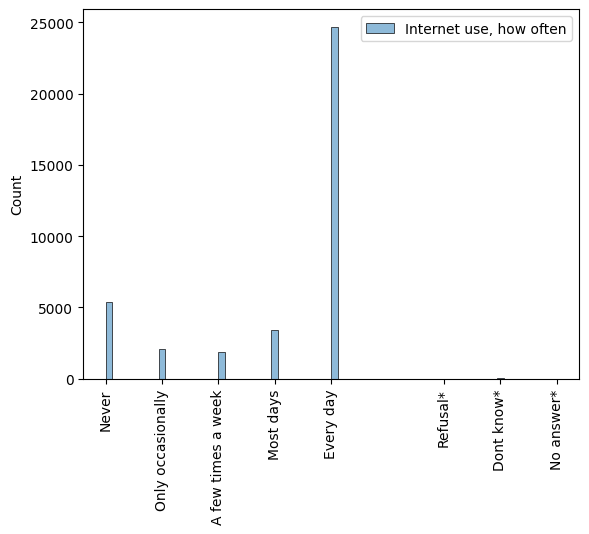

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(data[["netusoft"]])
sns.histplot(df)
plt.xticks(ticks=[1,2,3,4,5,7,8,9], rotation=90, labels=['Never','Only occasionally','A few times a week','Most days','Every day','Refusal*','Dont know*','No answer*'])
plt.legend(labels=['Internet use, how often'])

In [10]:
corr = data.corr()

<AxesSubplot:>

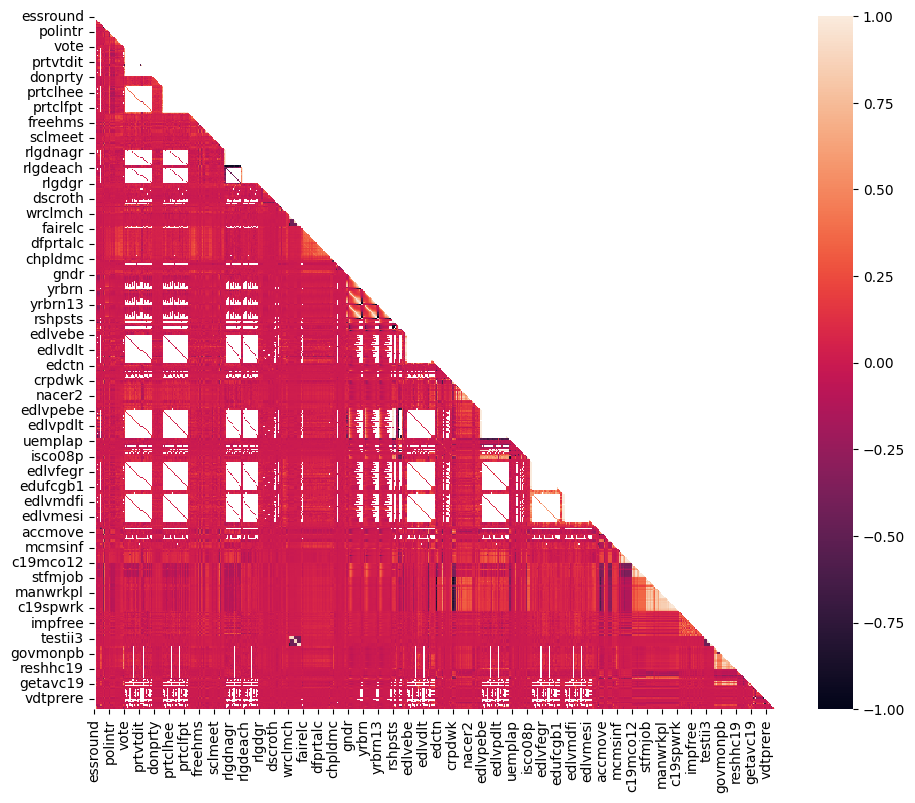

In [11]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask)

In [12]:
data.groupby('cntry').count()
#grouped by country

,name,essround,edition,proddate,idno,dweight,pspwght,pweight,anweight,nwspol,...,vinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
cntry,,,,,,,,,,,,,,,,,,,,,
BE,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341,...,1341,1341,1341,1341,1339,1341,1341,1341,1341,1341
BG,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,...,2426,2718,2718,2718,2687,2718,0,2718,2718,2718
CH,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,...,1523,1523,1523,1523,1486,1523,0,1523,1523,1523
CZ,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,...,2476,2476,2476,2476,2476,2476,0,2476,2476,2476
EE,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,...,1541,1541,1542,1542,1514,1542,0,1542,1542,1542
FI,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,...,0,1576,1232,1232,1565,1577,0,1577,1577,1577
FR,1977,1977,1977,1977,1977,1977,1977,1977,1977,1977,...,1977,1977,1977,1977,1930,1977,1977,1977,1977,1977
GB,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,...,1136,1114,0,0,1114,1149,0,1149,1149,1149
GR,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,...,2765,2799,2797,2794,2791,2799,0,2799,2799,2799


In [13]:
data.groupby('mode').count()
#mode of data collection : 
# 1	Interview, Face to face (CAPI)
# 2	Interview, Video (web based)
# 9	Not available*

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,kinwe,vinwe,inwde,jinws,jinwe,inwtm,domain,prob,stratum,psu
mode,,,,,,,,,,,,,,,,,,,,,
1,35263,35263,35263,35263,35263,35263,35263,35263,35263,35263,...,30039,31542,35229,33844,33820,34929,14247,35263,35263,35263
2,2312,2312,2312,2312,2312,2312,2312,2312,2312,2312,...,2024,2070,2310,2153,2147,2272,955,2312,2312,2312
9,36,36,36,36,36,36,36,36,36,36,...,14,13,31,12,12,23,15,36,36,36


In [14]:
dict_df = {
    "Human values" : 1,
    "Impact of COVID-19" : 1,
    "Test questions" : 1
}

In [15]:
df_test = data.iloc[:, 540:549]
dict_df['Test questions'] = df_test
dict_df['Test questions']

,testii1,testii2,testii3,testii4,testii5,testii6,testii7,testii8,testii9
0,6,6,6,2,2,3,66,66,66
1,6,6,6,66,66,66,4,4,4
2,6,6,6,6,5,4,66,66,66
3,6,6,6,4,4,4,66,66,66
4,6,6,6,66,66,66,8,7,6
...,...,...,...,...,...,...,...,...,...
37606,6,6,6,66,66,66,2,6,6
37607,6,6,6,66,66,66,9,3,6
37608,6,6,6,66,66,66,5,4,6
37609,6,6,6,4,5,3,66,66,66


In [16]:
df_human_values = data.iloc[:, 519:540]
dict_df['Human values'] = df_human_values
dict_df['Human values']

,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
0,4,3,1,4,2,4,4,2,3,2,...,2,2,2,5,3,2,2,3,3,2
1,2,3,2,3,2,3,3,1,5,3,...,1,2,1,3,2,2,2,2,1,2
2,2,4,1,2,3,1,3,3,3,2,...,3,3,2,3,3,3,3,3,1,3
3,2,1,2,1,1,1,1,2,2,1,...,1,1,1,7,1,1,1,1,1,1
4,3,2,2,4,3,4,2,2,3,2,...,2,4,2,5,1,3,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,3,4,2,3,3,5,3,4,4,5,...,3,4,2,6,2,2,3,2,3,3
37607,3,4,1,3,3,3,3,2,4,3,...,3,3,2,3,3,3,3,3,3,3
37608,2,2,2,3,2,3,2,2,3,2,...,2,4,2,4,3,3,4,2,2,3
37609,2,3,2,2,1,2,2,2,4,3,...,2,2,3,2,1,1,2,2,1,3


In [17]:
df_covid = data.iloc[:, 549:583]
dict_df['Impact of COVID-19'] = df_covid
dict_df['Impact of COVID-19']

,secgrdec,scidecpb,admc19,panpriph,panmonpb,govpriph,govmonpb,panfolru,panclobo,panresmo,...,hapfoc19,hapnoc19,hapnwc19,hapnpc19,haprec19,hapdkc19,hapnac19,icvacc19,getavc19,getnvc19
0,4,3,2,66,66,5,7,2,9,8,...,0,1,0,0,0,0,0,1,2,6
1,3,3,2,66,66,5,5,6,5,5,...,0,1,0,0,0,0,0,1,2,6
2,4,5,1,7,3,66,66,3,8,8,...,0,1,0,0,0,0,0,1,1,6
3,8,8,1,2,5,66,66,2,5,5,...,0,0,0,0,0,0,0,1,3,6
4,5,5,1,3,5,66,66,2,7,3,...,0,1,0,0,0,0,0,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,5,5,2,66,66,5,10,6,88,10,...,0,0,1,0,0,0,0,9,2,9
37607,4,4,1,5,9,66,66,6,5,0,...,0,1,0,0,0,0,0,9,2,9
37608,3,3,1,0,6,66,66,2,9,7,...,0,0,0,0,0,0,0,9,1,9
37609,5,5,2,66,66,3,6,4,5,5,...,0,1,0,0,0,0,0,9,2,9


In [18]:
df_dig_social_contacts = data.iloc[:, 449:519]
dict_df['Digital social contacts in works and family life'] = df_dig_social_contacts
dict_df['Digital social contacts in works and family life']

,acchome,accwrk,accmove,accoth,accnone,accref,accdk,accna,fampref,famadvs,...,wrkextra,colprop,colhlp,colspeak,colscrn,colphone,colcom,c19spwrk,c19mcwrk,mcwrkhom
0,1,0,1,1,0,0,0,0,2,4,...,66,66,6,66,66,66,66,66,66,66
1,1,0,0,1,0,0,0,0,5,5,...,66,66,6,66,66,66,66,66,66,66
2,1,0,0,1,0,0,0,0,3,3,...,66,66,6,66,66,66,66,66,66,66
3,0,1,0,0,0,0,0,0,1,1,...,8,3,2,3,7,7,1,4,3,88
4,1,1,1,1,0,0,0,0,3,3,...,10,1,2,2,7,3,4,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,1,0,0,0,0,0,0,0,2,2,...,66,66,6,66,66,66,66,66,66,66
37607,1,0,1,1,0,0,0,0,5,5,...,66,66,6,66,66,66,66,66,66,66
37608,1,0,0,1,0,0,0,0,4,4,...,5,4,2,5,4,3,4,3,3,6
37609,1,1,1,1,0,0,0,0,5,5,...,3,2,2,2,6,2,3,3,3,1


In [19]:
df_social_demographics = data.iloc[:, 268:449] 
dict_df['Socio-demographics'] = df_social_demographics
dict_df['Socio-demographics']

,rshpsts,rshpsmk,rshpsgb,lvgptnea,dvrcdeva,marsts,marstmk,marstgb,maritalb,chldhhe,...,edumcgb1,edumbgb2,edagemgb,emprm14,occm14b,atncrse,anctry1,anctry2,regunit,region
0,66,NaN,NaN,2,2,6,NaN,NaN,6,2,...,NaN,NaN,NaN,1,5,2,444444,11020,2,BE24
1,66,NaN,NaN,2,2,6,NaN,NaN,6,2,...,NaN,NaN,NaN,2,3,1,11021,11020,2,BE24
2,1,NaN,NaN,1,2,66,NaN,NaN,1,2,...,NaN,NaN,NaN,1,3,2,11050,555555,2,BE33
3,66,NaN,NaN,2,1,4,NaN,NaN,4,1,...,NaN,NaN,NaN,3,66,2,11020,888888,2,BE21
4,66,NaN,NaN,2,2,6,NaN,NaN,6,2,...,NaN,NaN,NaN,1,3,2,11040,555555,2,BE24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,3,NaN,NaN,6,2,1,NaN,NaN,1,6,...,NaN,NaN,NaN,3,66,2,15130,888888,3,SK021
37607,66,NaN,NaN,2,1,4,NaN,NaN,4,1,...,NaN,NaN,NaN,1,9,2,15130,555555,3,SK022
37608,1,NaN,NaN,2,2,66,NaN,NaN,1,2,...,NaN,NaN,NaN,3,66,2,15130,555555,3,SK041
37609,1,NaN,NaN,2,2,66,NaN,NaN,1,1,...,NaN,NaN,NaN,1,4,1,15130,555555,3,SK021


In [96]:
df_social_exclusion = data.iloc[:,106:177]
df_social_exclusion
dict_df['Subjective well-being, social exclusion, religion, national and ethnic identity'] = df_social_exclusion
dict_df['Subjective well-being, social exclusion, religion, national and ethnic identity']

,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,...,livecnta,lnghom1,lnghom2,feethngr,facntr,fbrncntc,mocntr,mbrncntc,ccnthum,ccrdprs
0,7,5,2,2,8,2,2,3,7,6,...,6666,ENG,DUT,2,2,NG,2,NG,4,5
1,6,4,4,2,2,2,2,3,3,3,...,2013,DUT,000,1,1,6666,1,6666,3,5
2,8,4,2,1,2,1,2,1,8,9,...,2000,FRE,000,1,2,FR,2,FR,4,8
3,10,5,3,2,2,2,1,3,9,8,...,2015,ARA,DUT,1,2,IQ,2,IQ,88,88
4,7,6,4,2,2,1,1,3,9,9,...,1993,DUT,000,1,2,NL,2,NL,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,5,3,1,2,2,3,3,3,10,8,...,6666,SLO,000,1,1,6666,1,6666,2,3
37607,8,7,1,3,2,1,2,3,10,9,...,6666,SLO,000,1,1,6666,1,6666,55,66
37608,7,3,3,3,2,2,2,3,9,7,...,6666,SLO,000,2,1,6666,1,6666,3,6
37609,7,6,1,4,2,2,2,3,6,7,...,6666,SLO,000,1,1,6666,1,6666,5,9


In [21]:
data.columns.get_loc('mocntr')
#dict_df.keys()

173

In [22]:
"Gender, Year of birth and Household grid"
"Understanding of democracy"
"Subjective well-being, social exclusion, religion, national and ethnic identity"
"Politics"
"Media and social trust"
"Identifier and weight variables"

'Identifier and weight variables'

In [23]:
df_human_values.iloc[[0],:]

,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
0,4,3,1,4,2,4,4,2,3,2,...,2,2,2,5,3,2,2,3,3,2


([<matplotlib.axis.XTick at 0x7f89a467f3a0>,
 [Text(0, 0, 'Extremely unhappy'), Text(10, 0, 'Extremely happy')])

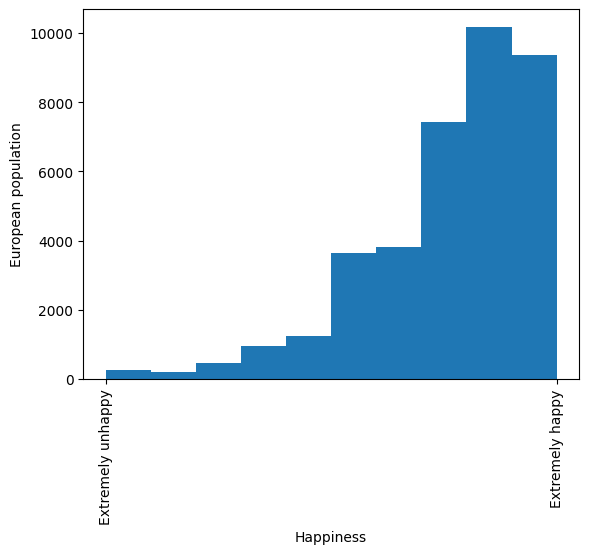

In [116]:
from matplotlib import pyplot as plt

df = dict_df['Subjective well-being, social exclusion, religion, national and ethnic identity']
df = df[['happy']][df['happy']<12]
df
plt.hist(df)
plt.xlabel('Happiness')
plt.ylabel('European population')
plt.xticks(ticks=[0,10], rotation=90, labels=['Extremely unhappy','Extremely happy'])
